# Setup

## Dataset

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

### Google Cloud Platform

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import auth
auth.authenticate_user()

project_id = 'XXXXXX'
!gcloud config set project {project_id}
!gsutil ls

In [ ]:
# Install Cloud Storage FUSE.
!echo "deb https://packages.cloud.google.com/apt gcsfuse-`lsb_release -c -s` main" | sudo tee /etc/apt/sources.list.d/gcsfuse.list
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | sudo apt-key add -
!apt -qq update && apt -qq install gcsfuse

In [ ]:
mount_path = "wildlifeod"
local_path = f"/mnt/gs/{mount_path}"

!mkdir -p {local_path}
!gcsfuse --implicit-dirs {mount_path} {local_path}

{"timestamp":{"seconds":1740126733,"nanos":536477415},"severity":"INFO","message":"Start gcsfuse/2.10.0 (Go version go1.23.5) for app \"\" using mount point: /mnt/gs/wildlifeod\n"}
{"timestamp":{"seconds":1740126733,"nanos":536511876},"severity":"INFO","message":"GCSFuse config","config":{"AppName":"","CacheDir":"","Debug":{"ExitOnInvariantViolation":false,"Fuse":false,"Gcs":false,"LogMutex":false},"EnableAtomicRenameObject":false,"EnableHns":true,"FileCache":{"CacheFileForRangeRead":false,"DownloadChunkSizeMb":50,"EnableCrc":false,"EnableODirect":false,"EnableParallelDownloads":false,"MaxParallelDownloads":24,"MaxSizeMb":-1,"ParallelDownloadsPerFile":16,"WriteBufferSize":4194304},"FileSystem":{"DirMode":"755","DisableParallelDirops":false,"FileMode":"644","FuseOptions":[],"Gid":-1,"HandleSigterm":true,"IgnoreInterrupts":true,"KernelListCacheTtlSecs":0,"PreconditionErrors":true,"RenameDirLimit":0,"TempDir":"","Uid":-1},"Foreground":false,"GcsAuth":{"AnonymousAccess":false,"KeyFile":"",

In [ ]:
import os

def find_ultralytics_yaml(root_dir):
  yaml_files = []
  for dirpath, dirnames, filenames in os.walk(root_dir):
    for filename in filenames:
      if filename == 'ultralytics.yaml':
        yaml_files.append(os.path.join(dirpath, filename))
  return yaml_files

def to_gcp_file_path(file_path):
  try:
    with open(file_path, 'r') as f:
      lines = f.readlines()
    f.close()

    with open(file_path, 'w') as f:
      for line in lines:
        f.write(line.replace('/data/Wildlife/', '/mnt/gs/wildlifeod/'))
    f.close()

    print(f"Successfully replaced 'foo' with 'bar' in {file_path}")
  except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
  except Exception as e:
    print(f"An error occurred: {e}")


for yaml in find_ultralytics_yaml(local_path):
  to_gcp_file_path(yaml)

Successfully replaced 'foo' with 'bar' in /mnt/gs/wildlifeod/NewDatasetVersions/0_1/ultralytics.yaml
Successfully replaced 'foo' with 'bar' in /mnt/gs/wildlifeod/NewDatasetVersions/0_3/ultralytics.yaml
Successfully replaced 'foo' with 'bar' in /mnt/gs/wildlifeod/NewDatasetVersions/0_5/ultralytics.yaml
Successfully replaced 'foo' with 'bar' in /mnt/gs/wildlifeod/NewDatasetVersions/1_0/ultralytics.yaml
Successfully replaced 'foo' with 'bar' in /mnt/gs/wildlifeod/NewDatasetVersions/threshold_0_1/overlap_0_0/ultralytics.yaml
Successfully replaced 'foo' with 'bar' in /mnt/gs/wildlifeod/NewDatasetVersions/threshold_0_1/overlap_0_1/ultralytics.yaml
Successfully replaced 'foo' with 'bar' in /mnt/gs/wildlifeod/NewDatasetVersions/threshold_0_1/overlap_0_3/ultralytics.yaml
Successfully replaced 'foo' with 'bar' in /mnt/gs/wildlifeod/NewDatasetVersions/threshold_0_3/overlap_0_0/ultralytics.yaml
Successfully replaced 'foo' with 'bar' in /mnt/gs/wildlifeod/NewDatasetVersions/threshold_0_3/overlap_0_

## Environment Setup

In [ ]:
import sys
import torch

print(f"Python version: {sys.version}")

try:
    print(f"PyTorch version: {torch.__version__}")
    if torch.cuda.is_available():
        print(f"CUDA version: {torch.version.cuda}")
    else:
        print("CUDA is not available.")
except ImportError:
    print("PyTorch is not installed.")

if torch.cuda.is_available():
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
    print(f"Total GPU Memory: {torch.cuda.get_device_properties(0).total_memory / (1024 ** 3):.2f} GB")
else:
    print("No GPU available.")

Python version: 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
PyTorch version: 2.5.1+cu124
CUDA version: 12.4
GPU Name: NVIDIA A100-SXM4-40GB
Total GPU Memory: 39.56 GB


In [ ]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0
gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



## MMDetection (New Setup)

In [ ]:
%pip install -U openmim
!mim install "mmengine>=0.7.0"
#!mim install "mmcv==2.1.0"

Looking in links: https://download.openmmlab.com/mmcv/dist/cu124/torch2.5.0/index.html


In [ ]:
%pip install "mmcv==2.1.0"

  Using cached mmcv-2.1.0.tar.gz (471 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for mmcv: filename=mmcv-2.1.0-cp311-cp311-linux_x86_64.whl size=38179412 sha256=64cb56d98cbccdc1cd0038d02cd3e8473a8384a9c483390c74f1acdb1e58cf94
  Stored in directory: /root/.cache/pip/wheels/57/22/96/9bcbfeaa838c1b705a4b2ac082539767fbcc79fa07ec01abcd
Successfully built mmcv


In [ ]:
# Install mmdetection
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection

%pip install -e .

Cloning into 'mmdetection'...
remote: Enumerating objects: 38023, done.
remote: Total 38023 (delta 0), reused 0 (delta 0), pack-reused 38023 (from 1)
Receiving objects: 100% (38023/38023), 63.25 MiB | 14.69 MiB/s, done.
Resolving deltas: 100% (26223/26223), done.
/content/mmdetection
Obtaining file:///content/mmdetection
  Preparing metadata (setup.py) ... done
  Running setup.py develop for mmdet


In [ ]:
import mmcv, mmdet, mmengine
print(mmcv.__version__, mmdet.__version__, mmengine.__version__)

2.1.0 3.3.0 0.10.6


In [ ]:
from mmengine.utils import get_git_hash
from mmengine.utils.dl_utils import collect_env as collect_base_env

import mmdet


def collect_env():
    """Collect the information of the running environments."""
    env_info = collect_base_env()
    env_info['MMDetection'] = f'{mmdet.__version__}+{get_git_hash()[:7]}'
    return env_info


if __name__ == '__main__':
    for name, val in collect_env().items():
        print(f'{name}: {val}')

sys.platform: linux
Python: 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
CUDA available: True
MUSA available: False
numpy_random_seed: 2147483648
GPU 0: NVIDIA A100-SXM4-40GB
CUDA_HOME: /usr/local/cuda
NVCC: Cuda compilation tools, release 12.5, V12.5.82
GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
PyTorch: 2.5.1+cu124
PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2024.2-Product Build 20240605 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.5.3 (Git Hash 66f0cb9eb66affd2da3bf5f8d897376f04aae6af)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX512
  - CUDA Runtime 12.5
  - Built with CUDA Runtime 12.4
  - NVCC architecture flags: -gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_70,code=sm_70;-gencode;arch=compute_75,code=sm_75;-g

# Work

## Faster R-CNN

In [ ]:
!mkdir ./checkpoints
#!mim download mmdet --config faster_rcnn_x101-64x4d_fpn_ms-3x_coco --dest ./checkpoints
%cd ./checkpoints
!wget https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_x101_64x4d_fpn_mstrain_3x_coco/faster_rcnn_x101_64x4d_fpn_mstrain_3x_coco_20210524_124528-26c63de6.pth

/content/mmdetection/checkpoints
--2025-02-16 17:52:49--  https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_x101_64x4d_fpn_mstrain_3x_coco/faster_rcnn_x101_64x4d_fpn_mstrain_3x_coco_20210524_124528-26c63de6.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 163.181.81.238, 163.181.81.231, 163.181.81.234, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|163.181.81.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 399533791 (381M) [application/octet-stream]
Saving to: ‘faster_rcnn_x101_64x4d_fpn_mstrain_3x_coco_20210524_124528-26c63de6.pth’

faster_rcnn_x101_64 100%[===================>] 381.02M  19.0MB/s    in 22s     

2025-02-16 17:53:13 (17.1 MB/s) - ‘faster_rcnn_x101_64x4d_fpn_mstrain_3x_coco_20210524_124528-26c63de6.pth’ saved [399533791/399533791]



In [ ]:
import mmengine
cfg = mmengine.Config.fromfile('/content/mmdetection/configs/faster_rcnn/faster-rcnn_x101-64x4d_fpn_ms-3x_coco.py')
print(cfg.dump())

auto_scale_lr = dict(base_batch_size=16, enable=False)
backend_args = None
data_root = 'data/coco/'
dataset_type = 'CocoDataset'
default_hooks = dict(
    checkpoint=dict(interval=1, type='CheckpointHook'),
    logger=dict(interval=50, type='LoggerHook'),
    param_scheduler=dict(type='ParamSchedulerHook'),
    sampler_seed=dict(type='DistSamplerSeedHook'),
    timer=dict(type='IterTimerHook'),
    visualization=dict(type='DetVisualizationHook'))
default_scope = 'mmdet'
env_cfg = dict(
    cudnn_benchmark=False,
    dist_cfg=dict(backend='nccl'),
    mp_cfg=dict(mp_start_method='fork', opencv_num_threads=0))
load_from = None
log_level = 'INFO'
log_processor = dict(by_epoch=True, type='LogProcessor', window_size=50)
model = dict(
    backbone=dict(
        base_width=4,
        depth=101,
        frozen_stages=1,
        groups=64,
        init_cfg=dict(
            checkpoint='open-mmlab://resnext101_64x4d', type='Pretrained'),
        norm_cfg=dict(requires_grad=True, type='BN'),
    

In [ ]:
# Make the config files
%cd /content/mmdetection

for THRESHOLD in ['0_1', '0_3', '0_5', '1_0']:
  for OVERLAP in ['0_0', '0_1', '0_3']:

    cfg.data_root = cfg.train_dataloader.dataset.dataset.data_root = cfg.test_dataloader.dataset.data_root = cfg.val_dataloader.dataset.data_root = f'/mnt/gs/wildlifeod/NewDatasetVersions/threshold_{THRESHOLD}/overlap_{OVERLAP}/' #'/content/drive/MyDrive/Aphid Datasets/COCO Format'

    cfg.train_dataloader.dataset.dataset.ann_file = f'/mnt/gs/wildlifeod/NewDatasetVersions/threshold_{THRESHOLD}/overlap_{OVERLAP}/annotations/train.json'
    cfg.test_dataloader.dataset.ann_file = cfg.test_evaluator.ann_file = f'/mnt/gs/wildlifeod/NewDatasetVersions/threshold_{THRESHOLD}/overlap_{OVERLAP}/annotations/valid.json'
    cfg.val_dataloader.dataset.ann_file = cfg.val_evaluator.ann_file = f'/mnt/gs/wildlifeod/NewDatasetVersions/threshold_{THRESHOLD}/overlap_{OVERLAP}/annotations/valid.json'

    cfg.train_dataloader.dataset.dataset.data_prefix = dict(img='train/images/')
    cfg.test_dataloader.dataset.data_prefix = cfg.val_dataloader.dataset.data_prefix = dict(img='val/images/')

    cfg.model.roi_head.bbox_head.num_classes = 1

    cfg.train_cfg.max_epochs = 5

    cfg.train_dataloader.batch_size = cfg.val_dataloader.batch_size = cfg.test_dataloader.batch_size = 4
    cfg.train_dataloader.num_workers = cfg.val_dataloader.num_workers = cfg.test_dataloader.num_workers = 4

    cfg.load_from = '/content/mmdetection/checkpoints/faster_rcnn_x101_64x4d_fpn_mstrain_3x_coco_20210524_124528-26c63de6.pth'

    print(cfg.dump())

    cfg.dump(f'/content/mmdetection/configs/faster_rcnn/faster-rcnn_x101-64x4d_fpn_ms-3x_coco_moose_threshold_{THRESHOLD}_overlap_{OVERLAP}.py')

/content/mmdetection
auto_scale_lr = dict(base_batch_size=16, enable=False)
backend_args = None
data_root = '/mnt/gs/wildlifeod/NewDatasetVersions/threshold_0_1/overlap_0_0/'
dataset_type = 'CocoDataset'
default_hooks = dict(
    checkpoint=dict(interval=1, type='CheckpointHook'),
    logger=dict(interval=50, type='LoggerHook'),
    param_scheduler=dict(type='ParamSchedulerHook'),
    sampler_seed=dict(type='DistSamplerSeedHook'),
    timer=dict(type='IterTimerHook'),
    visualization=dict(type='DetVisualizationHook'))
default_scope = 'mmdet'
env_cfg = dict(
    cudnn_benchmark=False,
    dist_cfg=dict(backend='nccl'),
    mp_cfg=dict(mp_start_method='fork', opencv_num_threads=0))
load_from = '/content/mmdetection/checkpoints/faster_rcnn_x101_64x4d_fpn_mstrain_3x_coco_20210524_124528-26c63de6.pth'
log_level = 'INFO'
log_processor = dict(by_epoch=True, type='LogProcessor', window_size=50)
model = dict(
    backbone=dict(
        base_width=4,
        depth=101,
        frozen_stages=1,

In [ ]:
!python tools/train.py /content/mmdetection/configs/faster_rcnn/faster-rcnn_x101-64x4d_fpn_ms-3x_coco_moose_threshold_1_0_overlap_0_3.py

/usr/local/lib/python3.11/dist-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \
2025-02-16 18:00:17.819770: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-16 18:00:17.836469: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739728817.858758   26375 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:

In [ ]:
!python tools/train.py /content/mmdetection/configs/faster_rcnn/faster-rcnn_x101-64x4d_fpn_ms-3x_coco_moose_threshold_0_1_overlap_0_3.py

/usr/local/lib/python3.11/dist-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \
2025-02-16 18:52:48.722957: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-16 18:52:48.741649: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739731968.765140   39923 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:

In [ ]:
# run the config files
!find /content/mmdetection/configs/faster_rcnn -name '*moose*.py' -exec python tools/train.py {} \;

Streaming output truncated to the last 5000 lines.
02/14 04:05:24 - mmengine - INFO - Epoch(train) [2][2150/2232]  lr: 2.0000e-02  eta: 0:40:35  time: 0.3581  data_time: 0.0079  memory: 16007  loss: 0.1169  loss_rpn_cls: 0.0059  loss_rpn_bbox: 0.0185  loss_cls: 0.0394  acc: 97.1191  loss_bbox: 0.0531
02/14 04:05:42 - mmengine - INFO - Epoch(train) [2][2200/2232]  lr: 2.0000e-02  eta: 0:40:17  time: 0.3599  data_time: 0.0078  memory: 16007  loss: 0.1074  loss_rpn_cls: 0.0053  loss_rpn_bbox: 0.0134  loss_cls: 0.0374  acc: 99.0234  loss_bbox: 0.0513
02/14 04:05:53 - mmengine - INFO - Exp name: faster-rcnn_x101-64x4d_fpn_ms-3x_coco_moose_threshold_0_1_overlap_0_3_20250214_033823
02/14 04:05:53 - mmengine - INFO - Saving checkpoint at 2 epochs
02/14 04:06:04 - mmengine - INFO - Epoch(val) [2][ 50/206]    eta: 0:00:26  time: 0.1730  data_time: 0.0254  memory: 16007  
02/14 04:06:12 - mmengine - INFO - Epoch(val) [2][100/206]    eta: 0:00:17  time: 0.1535  data_time: 0.0070  memory: 2247  
02

In [ ]:
# To save the results
!rsync -auvzh --exclude "*.pth" /content/mmdetection/work_dirs/ /content/drive/MyDrive/TMU/Wildlife/Moose/Code/UltralyticsLogs/

In [ ]:
cfg.data_root = cfg.train_dataloader.dataset.dataset.data_root = cfg.test_dataloader.dataset.data_root = cfg.val_dataloader.dataset.data_root = '/mnt/gs/wildlifeod/NewDatasetVersions/threshold_{THRESHOLD}/overlap_{OVERLAP}/' #'/content/drive/MyDrive/Aphid Datasets/COCO Format'

cfg.train_dataloader.dataset.dataset.ann_file = '/mnt/gs/wildlifeod/NewDatasetVersions/threshold_{THRESHOLD}/overlap_{OVERLAP}/annotations/train.json'
cfg.test_dataloader.dataset.ann_file = cfg.test_evaluator.ann_file = '/mnt/gs/wildlifeod/NewDatasetVersions/threshold_{THRESHOLD}/overlap_{OVERLAP}/annotations/valid.json'
cfg.val_dataloader.dataset.ann_file = cfg.val_evaluator.ann_file = '/mnt/gs/wildlifeod/NewDatasetVersions/threshold_{THRESHOLD}/overlap_{OVERLAP}/annotations/valid.json'

cfg.train_dataloader.dataset.dataset.data_prefix = dict(img='train/images/')
cfg.test_dataloader.dataset.data_prefix = cfg.val_dataloader.dataset.data_prefix = dict(img='val/images/')

cfg.model.roi_head.bbox_head.num_classes = 1

cfg.train_dataloader.batch_size = cfg.val_dataloader.batch_size = cfg.test_dataloader.batch_size = 4
cfg.train_dataloader.num_workers = cfg.val_dataloader.num_workers = cfg.test_dataloader.num_workers = 4

# for pretraining
#cfg.load_from = '/content/mmdetection/checkpoints/faster_rcnn_x101_64x4d_fpn_mstrain_3x_coco_20210524_124528-26c63de6.pth'
#cfg.load_from = '/content/drive/MyDrive/faster-rcnn_x101-64x4d_fpn_ms-3x_coco_aphids/epoch_11.pth'
cfg.load_from = '/content/mmdetection/checkpoints/faster_rcnn_x101_64x4d_fpn_mstrain_3x_coco_20210524_124528-26c63de6.pth'

print(cfg.dump())

auto_scale_lr = dict(base_batch_size=16, enable=False)
backend_args = None
data_root = '/mnt/gs/wildlifeod/NewDatasetVersions/threshold_0_5/overlap_0_1/'
dataset_type = 'CocoDataset'
default_hooks = dict(
    checkpoint=dict(interval=1, type='CheckpointHook'),
    logger=dict(interval=50, type='LoggerHook'),
    param_scheduler=dict(type='ParamSchedulerHook'),
    sampler_seed=dict(type='DistSamplerSeedHook'),
    timer=dict(type='IterTimerHook'),
    visualization=dict(type='DetVisualizationHook'))
default_scope = 'mmdet'
env_cfg = dict(
    cudnn_benchmark=False,
    dist_cfg=dict(backend='nccl'),
    mp_cfg=dict(mp_start_method='fork', opencv_num_threads=0))
load_from = '/content/mmdetection/checkpoints/faster_rcnn_x101_64x4d_fpn_mstrain_3x_coco_20210524_124528-26c63de6.pth'
log_level = 'INFO'
log_processor = dict(by_epoch=True, type='LogProcessor', window_size=50)
model = dict(
    backbone=dict(
        base_width=4,
        depth=101,
        frozen_stages=1,
        groups=64,
 

In [ ]:
cfg.dump('/content/mmdetection/configs/faster_rcnn/faster-rcnn_x101-64x4d_fpn_ms-3x_coco_aphids.py')

in mmdet.datasets.coco.py, replace the METAINFO with the following:

METAINFO = { 'classes': ('moose',), 'palette': [(220, 20, 60)] }

In [ ]:
%cd /content/mmdetection
# !python tools/train.py --resume "/content/drive/MyDrive/TMU/Aphid Segmentation Project/checkpoints/faster-rcnn_x101-64x4d_fpn_ms-3x_coco_aphids/epoch_11.pth" configs/faster_rcnn/faster-rcnn_x101-64x4d_fpn_ms-3x_coco_aphids.py
!python tools/train.py '/content/mmdetection/configs/faster_rcnn/faster-rcnn_x101-64x4d_fpn_ms-3x_coco_aphids.py'

/content/mmdetection
/usr/local/lib/python3.11/dist-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \
2025-02-13 20:32:42.995174: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739478763.016862   74322 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739478763.023568   74322 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Alb

In [ ]:
!rsync -auvzh /content/mmdetection/work_dirs/ /content/drive/MyDrive/TMU/Wildlife/Moose/Code/MMDetectionLogs/

sending incremental file list
created directory /content/drive/MyDrive/TMU/Wildlife/Moose/Code/MMDetectionLogs
./
faster-rcnn_x101-64x4d_fpn_ms-3x_coco_aphids/
faster-rcnn_x101-64x4d_fpn_ms-3x_coco_aphids/epoch_1.pth
faster-rcnn_x101-64x4d_fpn_ms-3x_coco_aphids/epoch_10.pth
faster-rcnn_x101-64x4d_fpn_ms-3x_coco_aphids/epoch_11.pth
faster-rcnn_x101-64x4d_fpn_ms-3x_coco_aphids/epoch_12.pth
faster-rcnn_x101-64x4d_fpn_ms-3x_coco_aphids/epoch_2.pth
faster-rcnn_x101-64x4d_fpn_ms-3x_coco_aphids/epoch_3.pth
faster-rcnn_x101-64x4d_fpn_ms-3x_coco_aphids/epoch_4.pth
faster-rcnn_x101-64x4d_fpn_ms-3x_coco_aphids/epoch_5.pth
faster-rcnn_x101-64x4d_fpn_ms-3x_coco_aphids/epoch_6.pth
faster-rcnn_x101-64x4d_fpn_ms-3x_coco_aphids/epoch_7.pth
faster-rcnn_x101-64x4d_fpn_ms-3x_coco_aphids/epoch_8.pth
faster-rcnn_x101-64x4d_fpn_ms-3x_coco_aphids/epoch_9.pth
faster-rcnn_x101-64x4d_fpn_ms-3x_coco_aphids/faster-rcnn_x101-64x4d_fpn_ms-3x_coco_aphids.py
faster-rcnn_x101-64x4d_fpn_ms-3x_coco_aphids/last_checkpoint

## CO-DETR

*   Model: Co-DINO*, Backbone=Swin-L, Epochs=16,Aug=DETR,Data=Objects365 pre-trained + COCO, Box AP = 64.1 at [link](https://github.com/open-mmlab/mmdetection/tree/main/configs/faster_rcnn) [NOTE: OOM Error, perhaps too large?]
*   Let's try the R50 variant (the 52.1 bbox)

In [ ]:
!mkdir ./checkpoints
%cd ./checkpoints
!wget https://download.openmmlab.com/mmdetection/v3.0/codetr/co_dino_5scale_r50_1x_coco-7481f903.pth

/content/mmdetection/checkpoints
--2025-02-16 06:37:58--  https://download.openmmlab.com/mmdetection/v3.0/codetr/co_dino_5scale_r50_1x_coco-7481f903.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 163.181.201.234, 163.181.201.235, 163.181.201.236, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|163.181.201.234|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 261242301 (249M) [application/octet-stream]
Saving to: ‘co_dino_5scale_r50_1x_coco-7481f903.pth’

co_dino_5scale_r50_ 100%[===================>] 249.14M  29.7MB/s    in 8.5s    

2025-02-16 06:38:06 (29.3 MB/s) - ‘co_dino_5scale_r50_1x_coco-7481f903.pth’ saved [261242301/261242301]



In [ ]:
import mmengine
cfg = mmengine.Config.fromfile('/content/mmdetection/projects/CO-DETR/configs/codino/co_dino_5scale_r50_8xb2_1x_coco.py') # This configs lives in the "projects" rather than "configs" subdir.
print(cfg.dump())

/usr/local/lib/python3.11/dist-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \


auto_scale_lr = dict(base_batch_size=16)
backend_args = None
batch_augments = [
    dict(pad_mask=True, size=(
        1024,
        1024,
    ), type='BatchFixedSizePad'),
]
custom_imports = dict(
    allow_failed_imports=False, imports=[
        'projects.CO-DETR.codetr',
    ])
data_root = 'data/coco/'
dataset_type = 'CocoDataset'
default_hooks = dict(
    checkpoint=dict(
        _scope_='mmdet',
        by_epoch=True,
        interval=1,
        max_keep_ckpts=3,
        type='CheckpointHook'),
    logger=dict(_scope_='mmdet', interval=50, type='LoggerHook'),
    param_scheduler=dict(_scope_='mmdet', type='ParamSchedulerHook'),
    sampler_seed=dict(_scope_='mmdet', type='DistSamplerSeedHook'),
    timer=dict(_scope_='mmdet', type='IterTimerHook'),
    visualization=dict(_scope_='mmdet', type='DetVisualizationHook'))
default_scope = 'mmdet'
env_cfg = dict(
    cudnn_benchmark=False,
    dist_cfg=dict(backend='nccl'),
    mp_cfg=dict(mp_start_method='fork', opencv_num_threads=0))
i

in mmdet.datasets.coco.py, replace the METAINFO with the following:

METAINFO = { 'classes': ('moose',), 'palette': [(220, 20, 60)] }

In [ ]:
# Make the config files
%cd /content/mmdetection

for THRESHOLD in ['0_1', '0_3', '0_5', '1_0']:
  for OVERLAP in ['0_0', '0_1', '0_3']:

    cfg.data_root = cfg.train_dataloader.dataset.data_root = cfg.test_dataloader.dataset.data_root = cfg.val_dataloader.dataset.data_root = f'/mnt/gs/wildlifeod/NewDatasetVersions/threshold_{THRESHOLD}/overlap_{OVERLAP}/'

    cfg.train_dataloader.dataset.ann_file = f'/mnt/gs/wildlifeod/NewDatasetVersions/threshold_{THRESHOLD}/overlap_{OVERLAP}/annotations/train.json'
    cfg.test_dataloader.dataset.ann_file = cfg.test_evaluator.ann_file = f'/mnt/gs/wildlifeod/NewDatasetVersions/threshold_{THRESHOLD}/overlap_{OVERLAP}/annotations/valid.json'
    cfg.val_dataloader.dataset.ann_file = cfg.val_evaluator.ann_file = f'/mnt/gs/wildlifeod/NewDatasetVersions/threshold_{THRESHOLD}/overlap_{OVERLAP}/annotations/valid.json'

    cfg.train_dataloader.dataset.data_prefix = dict(img='train/images/')
    cfg.test_dataloader.dataset.data_prefix = cfg.val_dataloader.dataset.data_prefix = dict(img='val/images/')

    cfg.num_classes = cfg.model.bbox_head[0].num_classes = cfg.model.query_head.num_classes = cfg.model.roi_head[0].bbox_head.num_classes = 1

    cfg.train_cfg.max_epochs = 5

    cfg.train_dataloader.batch_size = cfg.val_dataloader.batch_size = cfg.test_dataloader.batch_size = 1
    cfg.train_dataloader.num_workers = cfg.val_dataloader.num_workers = cfg.test_dataloader.num_workers = 1
    cfg.auto_scale_lr.base_batch_size = 1

    cfg.load_from = '/content/mmdetection/checkpoints/co_dino_5scale_r50_1x_coco-7481f903.pth'

    print(cfg.dump())

    cfg.dump(f'/content/mmdetection/projects/CO-DETR/configs/codino/co_dino_5scale_r50_8xb2_1x_moose_threshold_{THRESHOLD}_overlap_{OVERLAP}.py')

Streaming output truncated to the last 5000 lines.
                            1333,
                        ),
                        (
                            736,
                            1333,
                        ),
                        (
                            768,
                            1333,
                        ),
                        (
                            800,
                            1333,
                        ),
                    ],
                    type='RandomChoiceResize'),
            ],
        ],
        type='RandomChoice'),
    dict(type='PackDetInputs'),
]
val_cfg = dict(_scope_='mmdet', type='ValLoop')
val_dataloader = dict(
    batch_size=1,
    dataset=dict(
        _scope_='mmdet',
        ann_file=
        '/mnt/gs/wildlifeod/NewDatasetVersions/threshold_0_3/overlap_0_3/annotations/valid.json',
        backend_args=None,
        data_prefix=dict(img='val/images/'),
        data_root=
        '/mnt/gs/wildlifeod/

In [ ]:
# run the config files
#!find /content/mmdetection/projects/CO-DETR/configs -name '*moose*.py' -exec python tools/train.py {} \;
!find /content/mmdetection/projects/CO-DETR/configs -name '*r50*moose*.py' ! -name '*threshold_0_5_overlap_0_3*'
#!python tools/train.py '/content/mmdetection/projects/CO-DETR/configs/codino/co_dino_5scale_r50_8xb2_1x_moose_threshold_0_5_overlap_0_3.py'
#!find /content/mmdetection/projects/CO-DETR/configs -name '*r50*moose*.py' ! -name '*threshold_0_5_overlap_0_3*' -exec python tools/train.py {} \;

/content/mmdetection/projects/CO-DETR/configs/codino/co_dino_5scale_r50_8xb2_1x_moose_threshold_1_0_overlap_0_0.py
/content/mmdetection/projects/CO-DETR/configs/codino/co_dino_5scale_r50_8xb2_1x_moose_threshold_0_1_overlap_0_1.py
/content/mmdetection/projects/CO-DETR/configs/codino/co_dino_5scale_r50_8xb2_1x_moose_threshold_0_1_overlap_0_0.py
/content/mmdetection/projects/CO-DETR/configs/codino/co_dino_5scale_r50_8xb2_1x_moose_threshold_0_5_overlap_0_0.py
/content/mmdetection/projects/CO-DETR/configs/codino/co_dino_5scale_r50_8xb2_1x_moose_threshold_0_3_overlap_0_1.py
/content/mmdetection/projects/CO-DETR/configs/codino/co_dino_5scale_r50_8xb2_1x_moose_threshold_0_5_overlap_0_1.py
/content/mmdetection/projects/CO-DETR/configs/codino/co_dino_5scale_r50_8xb2_1x_moose_threshold_0_1_overlap_0_3.py
/content/mmdetection/projects/CO-DETR/configs/codino/co_dino_5scale_r50_8xb2_1x_moose_threshold_0_3_overlap_0_3.py
/content/mmdetection/projects/CO-DETR/configs/codino/co_dino_5scale_r50_8xb2_1x_

In [ ]:
# MISSING ONES:
!python tools/train.py /content/mmdetection/projects/CO-DETR/configs/codino/co_dino_5scale_r50_8xb2_1x_moose_threshold_0_1_overlap_0_1.py

/usr/local/lib/python3.11/dist-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \
2025-02-16 06:38:52.567207: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739687932.588645   24746 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739687932.595268   24746 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
02/16 06:38:56 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.

In [ ]:
# MISSING ONES:
!python tools/train.py /content/mmdetection/projects/CO-DETR/configs/codino/co_dino_5scale_r50_8xb2_1x_moose_threshold_0_3_overlap_0_0.py

/usr/local/lib/python3.11/dist-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \
2025-02-16 09:32:35.881688: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739698355.903624   67499 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739698355.910324   67499 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
02/16 09:32:39 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.

In [ ]:
# 5 got cut off, let's try it here.
!python tools/train.py /content/mmdetection/projects/CO-DETR/configs/codino/co_dino_5scale_r50_8xb2_1x_moose_threshold_0_3_overlap_0_1.py

/usr/local/lib/python3.11/dist-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \
2025-02-15 04:35:04.175607: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739594104.198189  188773 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739594104.205105  188773 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is availa

In [ ]:
# Let's run 5 through 8 in this notebook.
!python tools/train.py /content/mmdetection/projects/CO-DETR/configs/codino/co_dino_5scale_r50_8xb2_1x_moose_threshold_0_3_overlap_0_1.py
!python tools/train.py /content/mmdetection/projects/CO-DETR/configs/codino/co_dino_5scale_r50_8xb2_1x_moose_threshold_0_5_overlap_0_1.py
!python tools/train.py /content/mmdetection/projects/CO-DETR/configs/codino/co_dino_5scale_r50_8xb2_1x_moose_threshold_0_1_overlap_0_3.py
!python tools/train.py /content/mmdetection/projects/CO-DETR/configs/codino/co_dino_5scale_r50_8xb2_1x_moose_threshold_0_3_overlap_0_3.py

Streaming output truncated to the last 5000 lines.
batch_augments = [
    dict(pad_mask=True, size=(
        1024,
        1024,
    ), type='BatchFixedSizePad'),
]
custom_imports = dict(
    allow_failed_imports=False, imports=[
        'projects.CO-DETR.codetr',
    ])
data_root = '/mnt/gs/wildlifeod/NewDatasetVersions/threshold_0_5/overlap_0_1/'
dataset_type = 'CocoDataset'
default_hooks = dict(
    checkpoint=dict(
        _scope_='mmdet',
        by_epoch=True,
        interval=1,
        max_keep_ckpts=3,
        type='CheckpointHook'),
    logger=dict(_scope_='mmdet', interval=50, type='LoggerHook'),
    param_scheduler=dict(_scope_='mmdet', type='ParamSchedulerHook'),
    sampler_seed=dict(_scope_='mmdet', type='DistSamplerSeedHook'),
    timer=dict(_scope_='mmdet', type='IterTimerHook'),
    visualization=dict(_scope_='mmdet', type='DetVisualizationHook'))
default_scope = 'mmdet'
env_cfg = dict(
    cudnn_benchmark=False,
    dist_cfg=dict(backend='nccl'),
    mp_cfg=dict(mp_s

In [ ]:
!gcloud storage rsync -r /content/mmdetection/work_dirs/ "gs://wildlifeod/NewDatasetVersions/MMDetectionLogs"

At file:///content/mmdetection/work_dirs/**, worker process 122997 thread 138177960612992 listed 18...
At gs://wildlifeod/NewDatasetVersions/MMDetectionLogs/**, worker process 122997 thread 138177960612992 listed 274...
Copying file:///content/mmdetection/work_dirs/co_dino_5scale_r50_8xb2_1x_moose_threshold_0_1_overlap_0_1/20250216_063855/20250216_063855.log to gs://wildlifeod/NewDatasetVersions/MMDetectionLogs/co_dino_5scale_r50_8xb2_1x_moose_threshold_0_1_overlap_0_1/20250216_063855/20250216_063855.log
Copying file:///content/mmdetection/work_dirs/co_dino_5scale_r50_8xb2_1x_moose_threshold_0_1_overlap_0_1/20250216_063855/vis_data/20250216_063855.json to gs://wildlifeod/NewDatasetVersions/MMDetectionLogs/co_dino_5scale_r50_8xb2_1x_moose_threshold_0_1_overlap_0_1/20250216_063855/vis_data/20250216_063855.json
Copying file:///content/mmdetection/work_dirs/co_dino_5scale_r50_8xb2_1x_moose_threshold_0_1_overlap_0_1/20250216_063855/vis_data/config.py to gs://wildlifeod/NewDatasetVersions/MM

In [ ]:
!rsync -auvzh /content/mmdetection/work_dirs/ /content/drive/MyDrive/TMU/Wildlife/Moose/Code/MMDetectionLogs/

sending incremental file list
created directory /content/drive/MyDrive/TMU/Wildlife/Moose/Code/MMDetectionLogs
./
faster-rcnn_x101-64x4d_fpn_ms-3x_coco_aphids/
faster-rcnn_x101-64x4d_fpn_ms-3x_coco_aphids/epoch_1.pth
faster-rcnn_x101-64x4d_fpn_ms-3x_coco_aphids/epoch_10.pth
faster-rcnn_x101-64x4d_fpn_ms-3x_coco_aphids/epoch_11.pth
faster-rcnn_x101-64x4d_fpn_ms-3x_coco_aphids/epoch_12.pth
faster-rcnn_x101-64x4d_fpn_ms-3x_coco_aphids/epoch_2.pth
faster-rcnn_x101-64x4d_fpn_ms-3x_coco_aphids/epoch_3.pth
faster-rcnn_x101-64x4d_fpn_ms-3x_coco_aphids/epoch_4.pth
faster-rcnn_x101-64x4d_fpn_ms-3x_coco_aphids/epoch_5.pth
faster-rcnn_x101-64x4d_fpn_ms-3x_coco_aphids/epoch_6.pth
faster-rcnn_x101-64x4d_fpn_ms-3x_coco_aphids/epoch_7.pth
faster-rcnn_x101-64x4d_fpn_ms-3x_coco_aphids/epoch_8.pth
faster-rcnn_x101-64x4d_fpn_ms-3x_coco_aphids/epoch_9.pth
faster-rcnn_x101-64x4d_fpn_ms-3x_coco_aphids/faster-rcnn_x101-64x4d_fpn_ms-3x_coco_aphids.py
faster-rcnn_x101-64x4d_fpn_ms-3x_coco_aphids/last_checkpoint

# Inferencing

## Co-DETR

In [ ]:
# Get the basic config
import mmengine
cfg = mmengine.Config.fromfile('/content/mmdetection/projects/CO-DETR/configs/codino/co_dino_5scale_r50_8xb2_1x_coco.py') # This configs lives in the "projects" rather than "configs" subdir.
print(cfg.dump())

/usr/local/lib/python3.11/dist-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \


auto_scale_lr = dict(base_batch_size=16)
backend_args = None
batch_augments = [
    dict(pad_mask=True, size=(
        1024,
        1024,
    ), type='BatchFixedSizePad'),
]
custom_imports = dict(
    allow_failed_imports=False, imports=[
        'projects.CO-DETR.codetr',
    ])
data_root = 'data/coco/'
dataset_type = 'CocoDataset'
default_hooks = dict(
    checkpoint=dict(
        _scope_='mmdet',
        by_epoch=True,
        interval=1,
        max_keep_ckpts=3,
        type='CheckpointHook'),
    logger=dict(_scope_='mmdet', interval=50, type='LoggerHook'),
    param_scheduler=dict(_scope_='mmdet', type='ParamSchedulerHook'),
    sampler_seed=dict(_scope_='mmdet', type='DistSamplerSeedHook'),
    timer=dict(_scope_='mmdet', type='IterTimerHook'),
    visualization=dict(_scope_='mmdet', type='DetVisualizationHook'))
default_scope = 'mmdet'
env_cfg = dict(
    cudnn_benchmark=False,
    dist_cfg=dict(backend='nccl'),
    mp_cfg=dict(mp_start_method='fork', opencv_num_threads=0))
i

In [ ]:
# location of the checkpoint
ckpt_path = "/mnt/gs/wildlifeod/NewDatasetVersions/MMDetectionLogs/co_dino_5scale_r50_8xb2_1x_moose_threshold_0_5_overlap_0_1/epoch_5.pth"

In [ ]:
from mmdet.apis import DetInferencer

# Choose to use a config
model_name = '/mnt/gs/wildlifeod/NewDatasetVersions/MMDetectionLogs/co_dino_5scale_r50_8xb2_1x_moose_threshold_0_5_overlap_0_1/co_dino_5scale_r50_8xb2_1x_moose_threshold_0_5_overlap_0_1.py'
# Setup a checkpoint file to load
checkpoint = ckpt_path

# Set the device to be used for evaluation
device = 'cuda:0'

# Initialize the DetInferencer

inferencer = DetInferencer(model=model_name, weights=ckpt_path, device=device)

# Use the detector to do inference
img = '/mnt/gs/wildlifeod/NewDatasetVersions/threshold_0_5/overlap_0_1/train/images/DSC00031_small_14.jpg'
result = inferencer(img, out_dir='./output')

Loads checkpoint by local backend from path: /mnt/gs/wildlifeod/NewDatasetVersions/MMDetectionLogs/co_dino_5scale_r50_8xb2_1x_moose_threshold_0_5_overlap_0_1/epoch_5.pth


/usr/local/lib/python3.11/dist-packages/mmengine/runner/checkpoint.py:347: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(filename, map_location=map_l

02/21 10:53:02 - mmengine - INFO - 
rpn_conv.weight - torch.Size([256, 256, 3, 3]): 
NormalInit: mean=0, std=0.01, bias=0 
 
02/21 10:53:02 - mmengine - INFO - 
rpn_conv.bias - torch.Size([256]): 
NormalInit: mean=0, std=0.01, bias=0 
 
02/21 10:53:02 - mmengine - INFO - 
rpn_cls.weight - torch.Size([9, 256, 1, 1]): 
NormalInit: mean=0, std=0.01, bias=0 
 
02/21 10:53:02 - mmengine - INFO - 
rpn_cls.bias - torch.Size([9]): 
NormalInit: mean=0, std=0.01, bias=0 
 
02/21 10:53:02 - mmengine - INFO - 
rpn_reg.weight - torch.Size([36, 256, 1, 1]): 
NormalInit: mean=0, std=0.01, bias=0 
 
02/21 10:53:02 - mmengine - INFO - 
rpn_reg.bias - torch.Size([36]): 
NormalInit: mean=0, std=0.01, bias=0 
 


/content/mmdetection/projects/CO-DETR/codetr/transformer.py:1325: UserWarning: If you want to reduce GPU memory usage,                               please install fairscale by executing the                               following command: pip install fairscale.
  warnings.warn('If you want to reduce GPU memory usage, \


02/21 10:53:02 - mmengine - INFO - 
bbox_head.fc_cls.weight - torch.Size([2, 1024]): 
NormalInit: mean=0, std=0.01, bias=0 
 
02/21 10:53:03 - mmengine - INFO - 
bbox_head.fc_cls.bias - torch.Size([2]): 
NormalInit: mean=0, std=0.01, bias=0 
 
02/21 10:53:03 - mmengine - INFO - 
bbox_head.fc_reg.weight - torch.Size([4, 1024]): 
NormalInit: mean=0, std=0.001, bias=0 
 
02/21 10:53:03 - mmengine - INFO - 
bbox_head.fc_reg.bias - torch.Size([4]): 
NormalInit: mean=0, std=0.001, bias=0 
 
02/21 10:53:03 - mmengine - INFO - 
bbox_head.shared_fcs.0.weight - torch.Size([1024, 12544]): 
XavierInit: gain=1, distribution=uniform, bias=0 
 
02/21 10:53:03 - mmengine - INFO - 
bbox_head.shared_fcs.0.bias - torch.Size([1024]): 
XavierInit: gain=1, distribution=uniform, bias=0 
 
02/21 10:53:03 - mmengine - INFO - 
bbox_head.shared_fcs.1.weight - torch.Size([1024, 1024]): 
XavierInit: gain=1, distribution=uniform, bias=0 
 
02/21 10:53:03 - mmengine - INFO - 
bbox_head.shared_fcs.1.bias - torch.Size

/content/mmdetection/mmdet/models/dense_heads/anchor_head.py:108: UserWarning: DeprecationWarning: `num_anchors` is deprecated, for consistency or also use `num_base_priors` instead
  warnings.warn('DeprecationWarning: `num_anchors` is deprecated, '
/usr/local/lib/python3.11/dist-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


Output()

In [ ]:
# Show the structure of result dict
from rich.pretty import pprint
pprint(result, max_length=4)

{
│   'predictions': [
│   │   {
│   │   │   'labels': [0, 0, 0, 0, ... +178],
│   │   │   'scores': [
│   │   │   │   0.6075630784034729,
│   │   │   │   0.3635076582431793,
│   │   │   │   0.34389904141426086,
│   │   │   │   0.06749380379915237,
│   │   │   │   ... +178
│   │   │   ],
│   │   │   'bboxes': [
│   │   │   │   [212.92100524902344, 103.18716430664062, 226.3234405517578, 125.07282257080078],
│   │   │   │   [279.48687744140625, 193.59555053710938, 305.424560546875, 224.09901428222656],
│   │   │   │   [272.1273498535156, 40.0535774230957, 302.0275573730469, 73.18512725830078],
│   │   │   │   [310.6482849121094, 114.83318328857422, 326.28973388671875, 132.68609619140625],
│   │   │   │   ... +178
│   │   │   ]
│   │   }
│   ],
│   'visualization': [
│   │   array([[[170, 174, 183],
│   │   [167, 172, 178],
│   │   [166, 170, 179],
│   │   ...,
│   │   [182, 185, 202],
│   │   [177, 180, 197],
│   │   [182, 185, 202]],
│      
│      [[175, 179, 190],
│   │   [177, 181, 190],
│   │   [173, 177, 188],
│   │   ...,
│   │   [174, 177, 194],
│   │   [169, 172, 189],
│   │   [182, 185, 202]],
│      
│      [[180, 184, 196],
│   │   [178, 182, 193],
│   │   [166, 170, 182],
│   │   ...,
│   │   [176, 179, 196],
│   │   [172, 175, 192],
│   │   [185, 188, 205]],
│      
│      ...,
│      
│      [[191, 194, 209],
│   │   [193, 196, 211],
│   │   [192, 195, 210],
│   │   ...,
│   │   [191, 194, 213],
│   │   [187, 190, 209],
│   │   [190, 193, 212]],
│      
│      [[195, 198, 213],
│   │   [195, 198, 213],
│   │   [193, 196, 211],
│   │   ...,
│   │   [191, 194, 213],
│   │   [190, 193, 212],
│   │   [192, 195, 214]],
│      
│      [[188, 191, 206],
│   │   [187, 190, 205],
│   │   [185, 188, 203],
│   │   ...,
│   │   [194, 197, 216],
│   │   [192, 195, 214],
│   │   [189, 192, 211]]], dtype=uint8)
│   ]
}

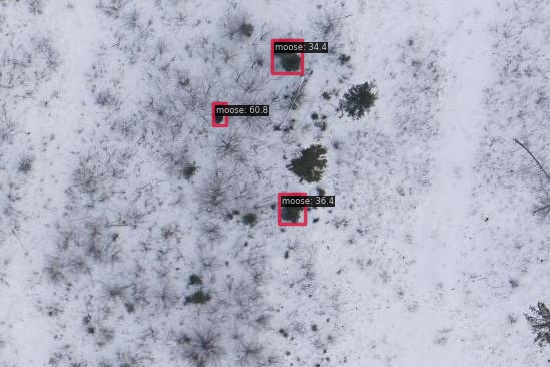

In [ ]:
# Show the output image
from PIL import Image
Image.open('./output/vis/DSC00031_small_14.jpg')

## Faster R-CNN

In [ ]:
# location of the checkpoint
ckpt_path = "/mnt/gs/wildlifeod/NewDatasetVersions/MMDetectionLogs/faster-rcnn_x101-64x4d_fpn_ms-3x_coco_moose_threshold_0_5_overlap_0_1/epoch_5.pth"

In [ ]:
from mmdet.apis import DetInferencer

# Choose to use a config
model_name = '/mnt/gs/wildlifeod/NewDatasetVersions/MMDetectionLogs/faster-rcnn_x101-64x4d_fpn_ms-3x_coco_moose_threshold_0_5_overlap_0_1/faster-rcnn_x101-64x4d_fpn_ms-3x_coco_moose_threshold_0_5_overlap_0_1.py'
# Setup a checkpoint file to load
checkpoint = ckpt_path

# Set the device to be used for evaluation
device = 'cuda:0'

# Initialize the DetInferencer

inferencer = DetInferencer(model=model_name, weights=ckpt_path, device=device)

# Use the detector to do inference
img = '/mnt/gs/wildlifeod/NewDatasetVersions/threshold_0_5/overlap_0_1/train/images/DSC00031_small_14.jpg'
result = inferencer(img, out_dir='./output')

Loads checkpoint by local backend from path: /mnt/gs/wildlifeod/NewDatasetVersions/MMDetectionLogs/faster-rcnn_x101-64x4d_fpn_ms-3x_coco_moose_threshold_0_5_overlap_0_1/epoch_5.pth


/usr/local/lib/python3.11/dist-packages/mmengine/runner/checkpoint.py:347: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(filename, map_location=map_l

Output()

In [ ]:
# Show the structure of result dict
from rich.pretty import pprint
pprint(result, max_length=4)

{
│   'predictions': [
│   │   {
│   │   │   'labels': [0],
│   │   │   'scores': [0.9987301230430603],
│   │   │   'bboxes': [[213.0525665283203, 103.14085388183594, 225.10926818847656, 124.57108306884766]]
│   │   }
│   ],
│   'visualization': [
│   │   array([[[170, 174, 183],
│   │   [167, 172, 178],
│   │   [166, 170, 179],
│   │   ...,
│   │   [182, 185, 202],
│   │   [177, 180, 197],
│   │   [182, 185, 202]],
│      
│      [[175, 179, 190],
│   │   [177, 181, 190],
│   │   [173, 177, 188],
│   │   ...,
│   │   [174, 177, 194],
│   │   [169, 172, 189],
│   │   [182, 185, 202]],
│      
│      [[180, 184, 196],
│   │   [178, 182, 193],
│   │   [166, 170, 182],
│   │   ...,
│   │   [176, 179, 196],
│   │   [172, 175, 192],
│   │   [185, 188, 205]],
│      
│      ...,
│      
│      [[191, 194, 209],
│   │   [193, 196, 211],
│   │   [192, 195, 210],
│   │   ...,
│   │   [191, 194, 213],
│   │   [187, 190, 209],
│   │   [190, 193, 212]],
│      
│      [[195, 198, 213],
│   │   [195, 198, 213],
│   │   [193, 196, 211],
│   │   ...,
│   │   [191, 194, 213],
│   │   [190, 193, 212],
│   │   [192, 195, 214]],
│      
│      [[188, 191, 206],
│   │   [187, 190, 205],
│   │   [185, 188, 203],
│   │   ...,
│   │   [194, 197, 216],
│   │   [192, 195, 214],
│   │   [189, 192, 211]]], dtype=uint8)
│   ]
}

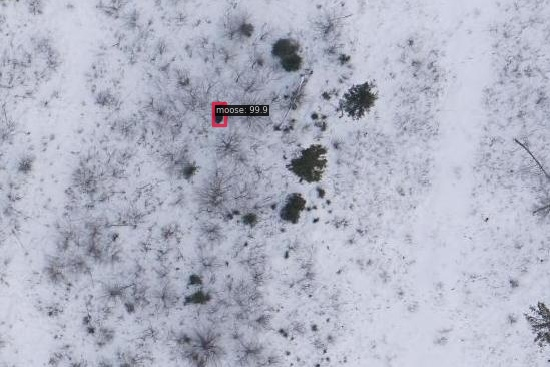

In [ ]:
# Show the output image
from PIL import Image
Image.open('./output/vis/DSC00031_small_14.jpg')